In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv("iris.csv")

In [26]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
data.iloc[:, :4]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
data["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

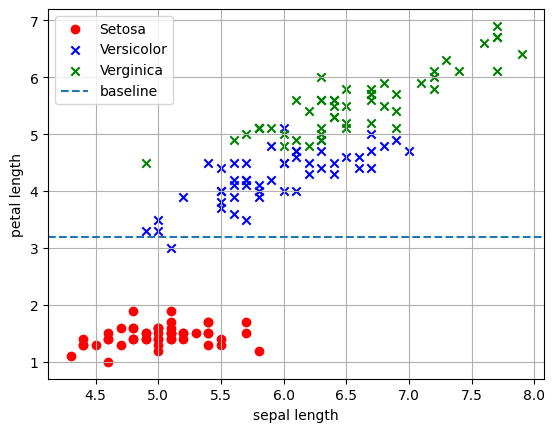

In [70]:
X = data.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='x', label='Verginica')
plt.axhline(y=np.mean(X[:50, 1].max() + X[100:150, 1].min()) / 2, linestyle='--', 
           label='baseline')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.grid(True)

In [59]:
X = data.iloc[:, :4]
target = data["variety"]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=.3)

## Preprocessing

In [72]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

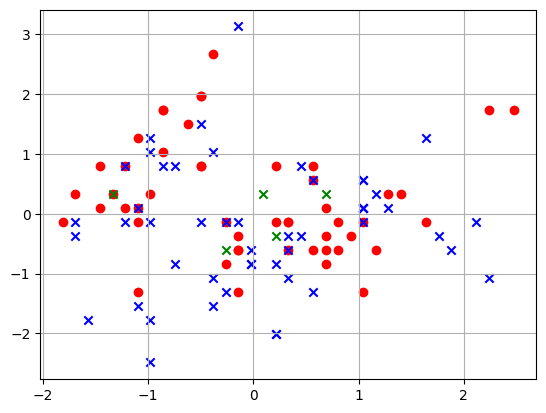

In [73]:
plt.scatter(X_train[:50, 0], X_train[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X_train[50:100, 0], X_train[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X_train[100:150, 0], X_train[100:150, 1], color='green', marker='x', label='Verginica')
plt.grid(True)

## Perceptron

In [48]:
class Perceptron:
    def __init__(self, alpha, max_iterations, verbose=False):
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.verbose = verbose

    def fit(self, X, y):
        self.W = np.zeros(X.shape[1] + 1)
        self.errors = []
        for _ in range(self.max_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.W[1:] += update * xi
                self.W[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def forward(self, X):
        return np.dot(X, self.W[1:]) + self.W[0]
    
    def predict(self, X):
        return np.where(self.forward(X) >= 0.0, 1, -1)

In [75]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(alpha=0.1, max_iter=40)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.1, max_iter=40)

In [96]:
def get_prediction_and_answer(sample, model, y_true):
    print(f"Test Sample: {sample}")
    print(f"Prediction: {model.predict(np.array(sample).reshape(1, -1))[0]}")
    print(f"y_true: {y_true}")


for index, y_data in enumerate(zip(X_test, y_test)):
    print(f"----Number #{index}----")
    get_prediction_and_answer(y_data[0], ppn, y_data[1])

----Number #0----
Test Sample: [ 0.45038209 -2.01729701  0.41290471  0.40989836]
Prediction: Versicolor
y_true: Versicolor
----Number #1----
Test Sample: [-0.85992349  1.72751954 -1.28729115 -1.1551681 ]
Prediction: Setosa
y_true: Setosa
----Number #2----
Test Sample: [1.28421292 0.0891623  0.63959749 0.40989836]
Prediction: Versicolor
y_true: Versicolor
----Number #3----
Test Sample: [-0.97904218  1.02536644 -1.23061796 -0.76390148]
Prediction: Setosa
y_true: Setosa
----Number #4----
Test Sample: [-0.97904218  0.7913154  -1.28729115 -1.2855903 ]
Prediction: Setosa
y_true: Setosa
----Number #5----
Test Sample: [ 1.16509423 -0.14488874  0.97963666  1.19243158]
Prediction: Virginica
y_true: Virginica
----Number #6----
Test Sample: [-1.21727956 -0.14488874 -1.34396435 -1.1551681 ]
Prediction: Setosa
y_true: Setosa
----Number #7----
Test Sample: [ 0.68861947 -0.6129908   1.03630986  1.19243158]
Prediction: Virginica
y_true: Virginica
----Number #8----
Test Sample: [-0.26433004 -0.37893977 

In [100]:
y_pred = ppn.predict(X_test)
accuracy = (y_test == y_pred).sum() / len(y_test)
accuracy

0.8888888888888888

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8888888888888888


In [80]:
from matplotlib.colors import ListedColormap


def plot_regions(X, y, model, test_idx=None, resolution=.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    classifier = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    classifier = classifier.reshape(xx1.shape)
    plt.contourf(xx1, xx2, classifier, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for index, class_ in enumerate(np.unique(y)):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], 
                   alpha=0.8, c=cmap(idx))
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', s=55, label='Test data')
    